<h1>Logistic Regression</h1>


Logistic regression is a supervised machine learning algorithm, that predicts the probability of a datapoint beloning to a certain category. These probabilities are used to assign observations to the more probable group.

<h3>Linear Regression Approach</h3>

The y variable in this case is binary for logistic regression. This does not make sense for logistic regression so apply logit link function to the left hand side of the linear regression model.

The equation is:

ln(p/1-p) = b_0 +b_1x_1 +b_2x_2...

Inside the natural logarithm is the odds. 

The sigmoid function is the inverse of the logit function and produces a curve of probability for x values.

For this lesson I will use the Wisconsin Breast Cancer Data Set available here https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download to predict whether a tumour is benign (0) or malignant (1)

<h2>Classification Thresholding</h2>

The default threshold in sklearn is 0.5. Dependent on use case the threshold can be changed, for example cancer diagnosis. To ensure most patients with cancer are identified the threshold can be moved down, increasing the positive classification sensitivity. This can sometimes increase this overall number of misclassifications.

<h2>Confusion Matrix</h2>

Information about the number of fals positives and negatives:

<code>from sklearn import confusion_matrix
    confusionMatrix = confusion_matrix(y_true, y_pred)</code>

Ouputs an array
<code>[[true neg, false pos],
        [false neg, true pos]]</code>


Accuracy = (TP + TN)/(TP + FP + TN + FN)

Precision = TP/(TP + FP)

Recall = TP/(TP + FN)

F1 = 2*((Precision*Recall)/(Precision+Recall))

<h2> Primary Assumptions </h2>
 - The target variable is binary

 - Independent observations, violation in this case is a patient biopsied more than once.
 
 - Large enough sample size as Logistic Regression is fit using a maximum likelihood estimator and convergence must be achieved. 
    - Rule - 10 samples per feature for the smallest class in the outcome variable. For example, if there were 100 samples and the outcome variable <code>diagnosis</code> had 60 benign tumors and 40 malignant tumors, then the max number of features allowed would be 4.
- No influential outliers, zscores, IQR and scalers can be used



In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import zscore

df = pd.read_csv("/Users/jai/Documents/GitHub/MachineLearningPortfolio/LogisticRegression/breastCancer.csv")

In [21]:
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [22]:
# Verify in the outcome variable is binary
outcome_var = 'diagnosis'

In [23]:
df[outcome_var].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [24]:
# Mapping the outcome variable to be 1 or 0
df[outcome_var] = df[outcome_var].replace({'M':1, 'B':0})
print(df.head())

         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoo

In [25]:
# Ensuring no duplicate patients
df['id'].nunique() == df['id'].count()
# No repeat patient ida

True

In [26]:
# Dealing with class imbalance
max_features = min(df[outcome_var].value_counts())/10
print(max_features)

21.2


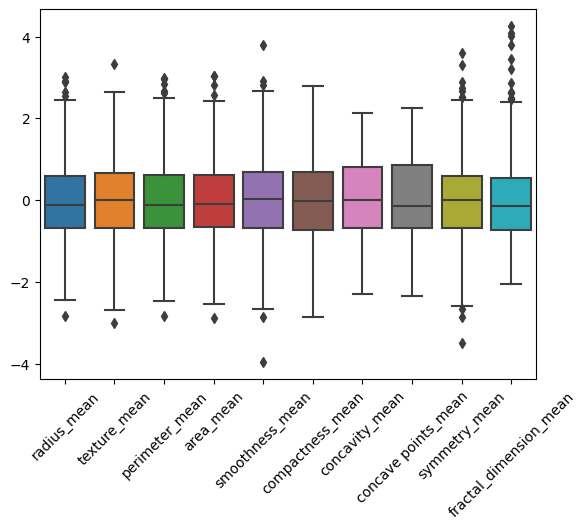

In [27]:
predictor_var = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

sns.boxplot(data=np.log(df[predictor_var]+.01).apply(zscore))
plt.xticks(rotation=45);
plt.show()
# Log needed as the data is not normally distributed and skewed to the right since most lumps are benign.
# symmetry_mean and fractal_dimension_mean have drastic outliers

In [28]:
# Removing samples above the 99 percentile
q_hi = df[['fractal_dimension_mean', 'symmetry_mean']].quantile(0.99)
df_filtered = df[(df['fractal_dimension_mean'] < q_hi['fractal_dimension_mean']) &
(df['symmetry_mean'] < q_hi['symmetry_mean'])
]

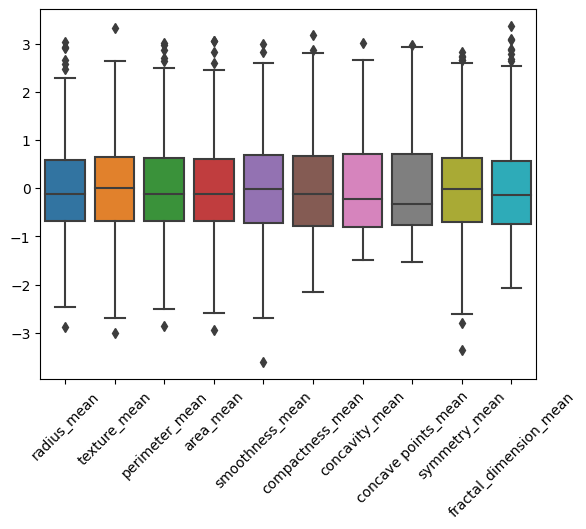

In [29]:
sns.boxplot(np.log(df_filtered[predictor_var]+0.1).apply(zscore))
plt.xticks(rotation=45)
plt.show()

<h1> Further Assumptions </h1>
 
 - Features are linearly related to log odds, ie the features are linearly related to the logit of the outcome.  

 - No multicollinearity between features 

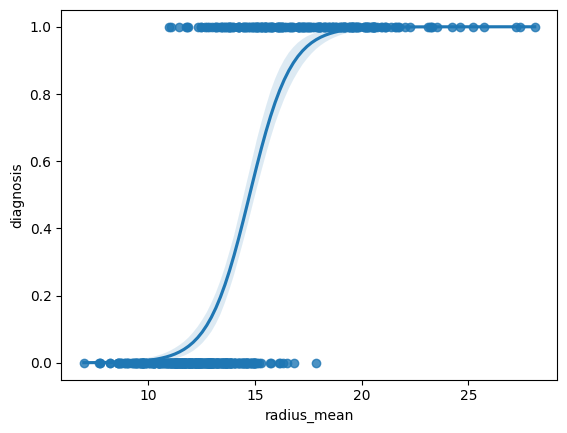

In [30]:
sns.regplot(x= 'radius_mean', y= 'diagnosis', data= df, logistic= True,)
plt.show()

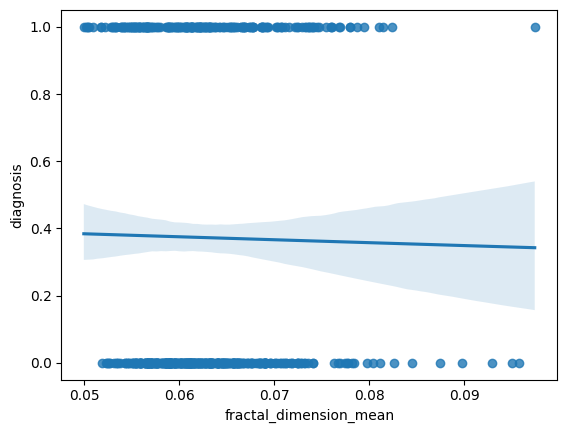

In [31]:
sns.regplot(x= 'fractal_dimension_mean', y= 'diagnosis', data= df, logistic= True)
plt.show()

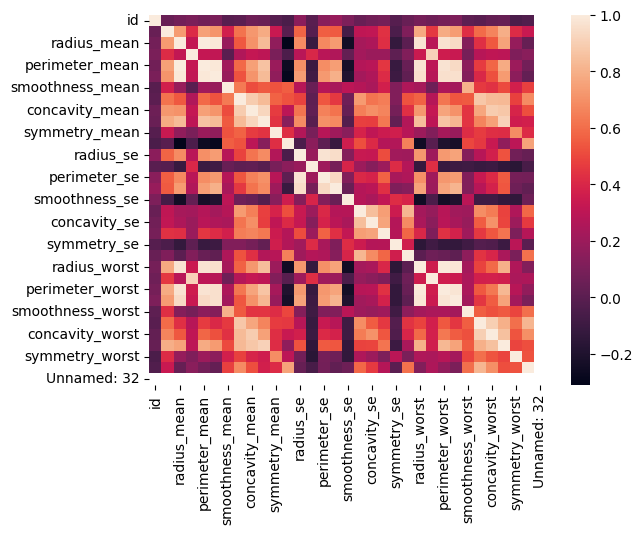

In [32]:
correlation_matrix = df_filtered.corr()
sns.heatmap(correlation_matrix)
plt.show()

In [33]:
highly_corellated_features = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'compactness_mean']

<h1>Implementing Logistic Regression</h1>

<h3> Model Training and Hyperparameters</h3>

- Hyperparameters are set before the model is implemented and tuned iteratively to improve accuracy.

- Parameters are the outputs of the model: coefficients and intercept.

<h3>Evaluation Metrics</h3>

 - Precision
 - Accuracy 
 - Recall
 - F1 Score 

In [34]:
# Create the test and train split   

X_train, X_test, y_train, y_test = train_test_split(df_filtered[predictor_var], df_filtered[outcome_var], test_size=0.3, random_state=0)

# Instatiate the model
log_reg = LogisticRegression(penalty='none', fit_intercept=True)
log_reg.fit(X_train, y_train)
print(log_reg.get_params())

intercept = log_reg.intercept_
print(f"Intercept: {intercept}")
coeffs = log_reg.coef_
print("Coefficients: {coeffs}")

y_pred = log_reg.predict(X_test)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'none', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Intercept: [-22.21704407]
Coefficients: {coeffs}


/Users/jai/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/jai/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
# Model Evaluation 
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")
precision = precision_score(y_test, y_pred)
print(f"Precision Score: {precision}")
recall = recall_score(y_test, y_pred)
print(f"Recall Score: {recall}")
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

Accuracy Score: 0.9345238095238095
Precision Score: 0.8840579710144928
Recall Score: 0.953125
F1 Score: 0.9172932330827068


In [36]:
# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

[[96  8]
 [ 3 61]]


96 + 61 = 147 predictted correctly 
3 people told it is benign when malignant 
8 people told it is malignant when benign

<h1>Prediction Thresholds</h1>